In [2]:
import pandas as pd
df= pd.read_csv("/content/indian_pharmaceutical_products_clean.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())


   product_id                brand_name                          manufacturer  \
0           1  Augmentin 625 Duo Tablet  Glaxo SmithKline Pharmaceuticals Ltd   
1           2       Azithral 500 Tablet           Alembic Pharmaceuticals Ltd   
2           3          Ascoril LS Syrup          Glenmark Pharmaceuticals Ltd   
3           4      Allegra 120mg Tablet                      Sanofi India Ltd   
4           5            Avil 25 Tablet                      Sanofi India Ltd   

   price_inr  is_discontinued dosage_form  pack_size pack_unit  \
0     223.42            False      tablet       10.0     strip   
1     132.36            False      tablet        5.0     strip   
2     118.00            False       syrup      100.0    bottle   
3     218.81            False      tablet       10.0     strip   
4      10.96            False      tablet       15.0     strip   

   num_active_ingredients primary_ingredient primary_strength  \
0                       2        Amoxycillin       

## UNIVARIATE ANALYSIS

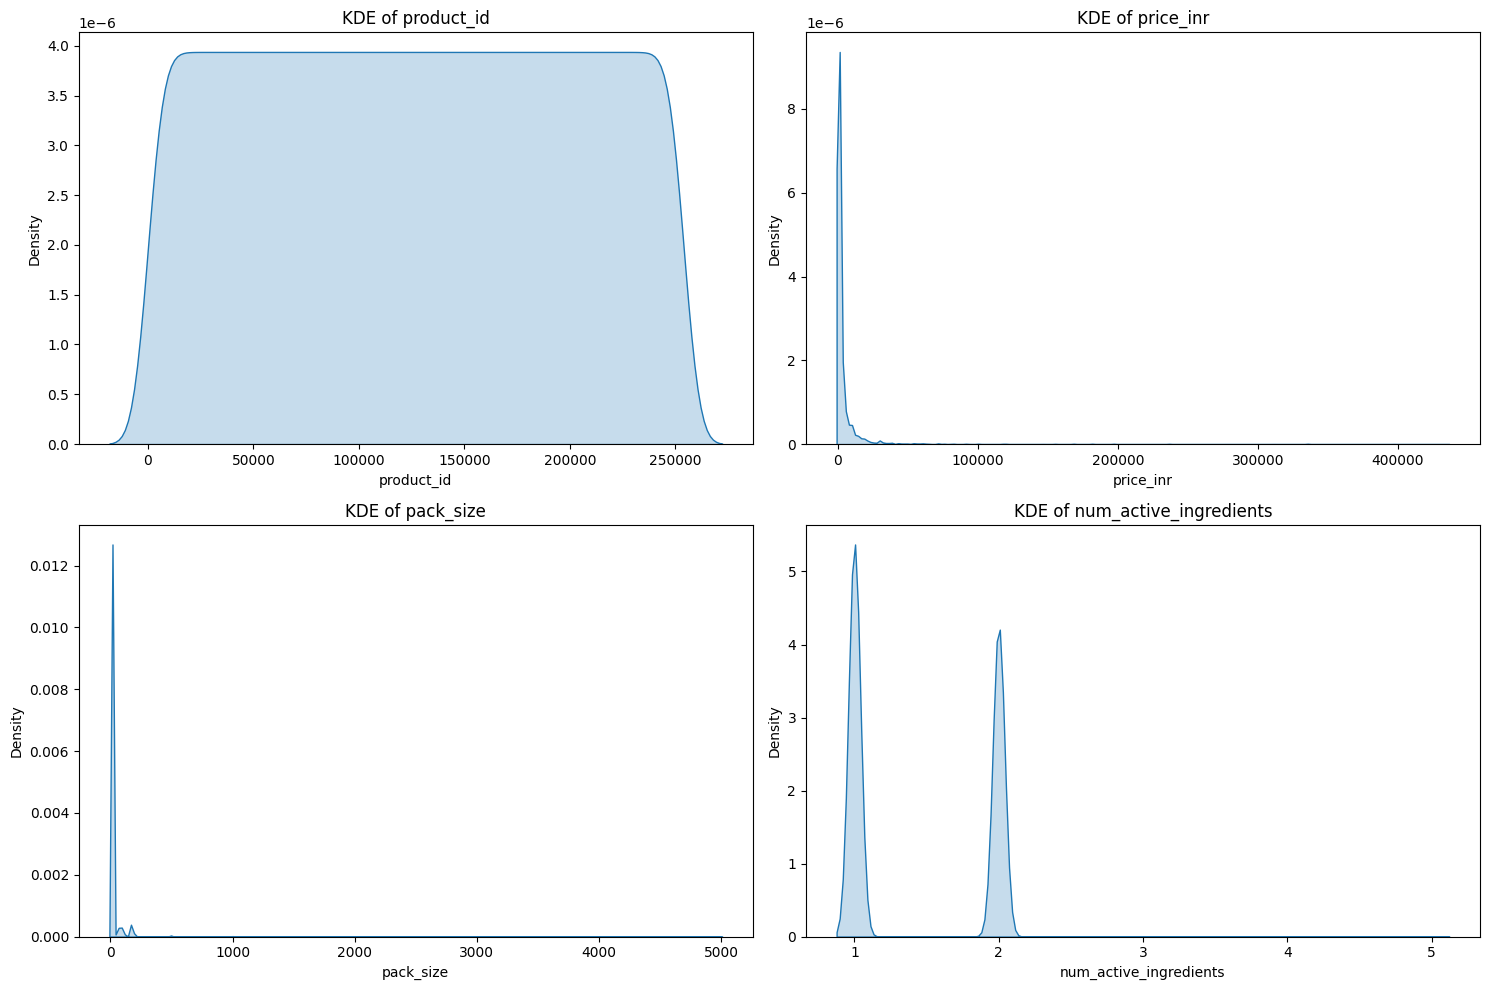

In [12]:
columns = ['product_id', 'price_inr', 'pack_size', 'num_active_ingredients']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4-697483224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='count',y='brand_name',palette='viridis')


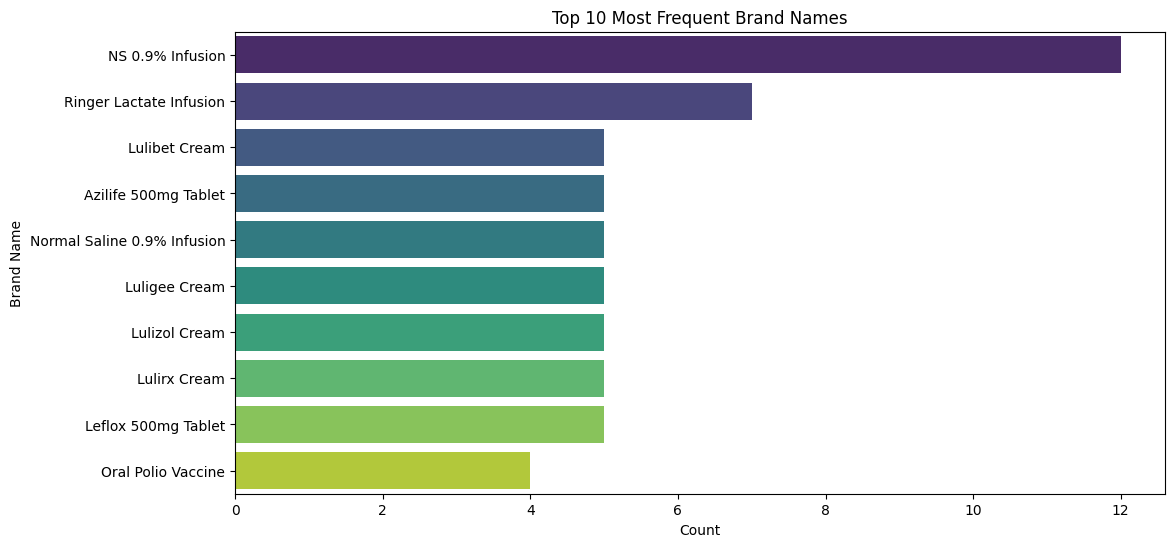

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

top_brands=df['brand_name'].value_counts().nlargest(10).reset_index()
top_brands.columns=['brand_name','count']

plt.figure(figsize=(12,6))
sns.barplot(data=top_brands, x='count',y='brand_name',palette='viridis')
plt.title('Top 10 Most Frequent Brand Names')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.show()



/tmp/ipython-input-9-1076846031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_manufacturers , x='count' , y='manufacturer' , palette='magma')


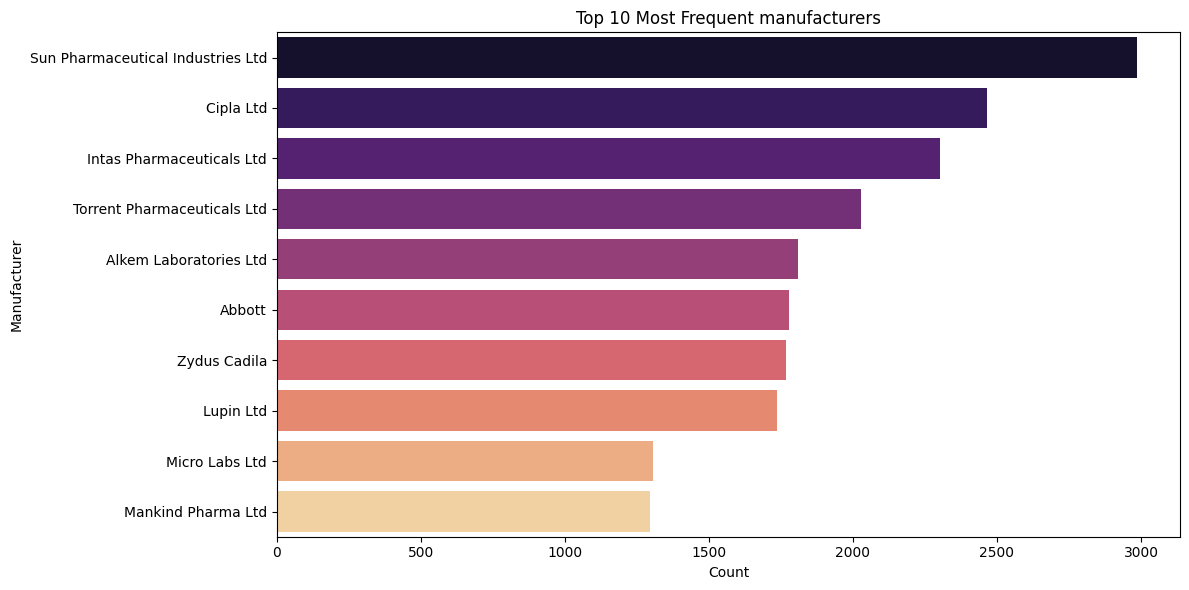

In [9]:
top_manufacturers=df['manufacturer'].value_counts().nlargest(10).reset_index()
top_manufacturers.columns=['manufacturer','count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_manufacturers , x='count' , y='manufacturer' , palette='magma')
plt.title('Top 10 Most Frequent manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

INSIGHTS :

1. The top 10 manufacturers account for a large share of the product listings, showing a concentrated market.

2. Most common brands dominate lower and mid-price segments.

# BIVARIATE ANALYSIS

/tmp/ipython-input-11-3107004964.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df ,x='price_inr' ,y='brand_name',palette='flare')


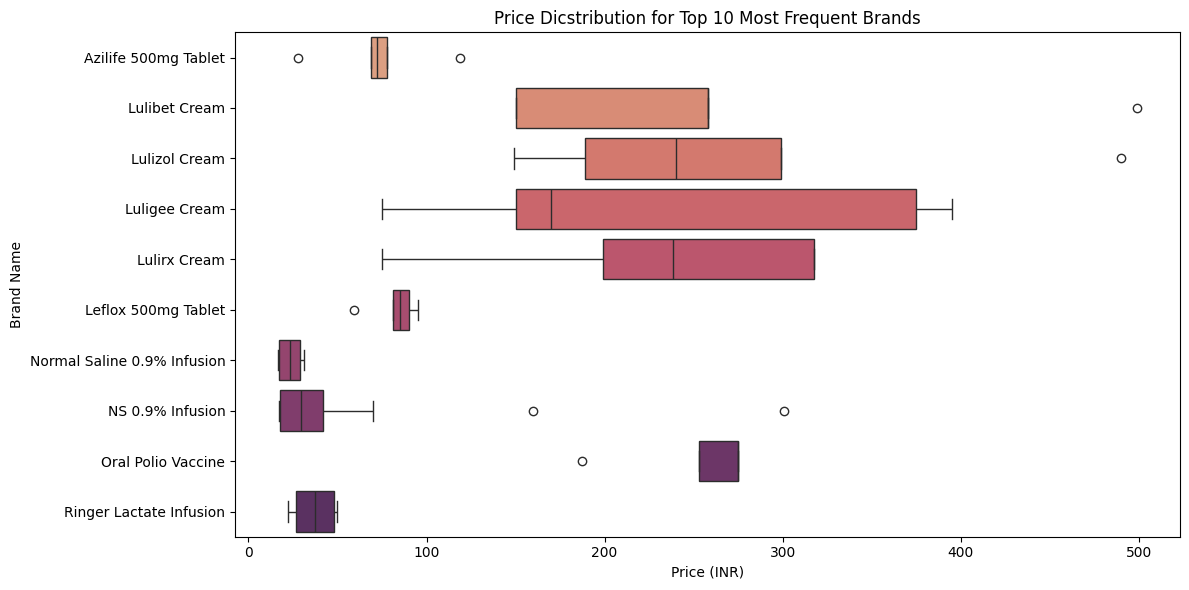

In [11]:
#Price dist. per Brand

top_products=df['brand_name'].value_counts().nlargest(10).index

filtered_df=df[df['brand_name'].isin(top_products)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df ,x='price_inr' ,y='brand_name',palette='flare')
plt.title('Price Dicstribution for Top 10 Most Frequent Brands')
plt.xlabel('Price (INR)')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-2850341993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df,x='pack_size',y='brand_name',palette='Set2')


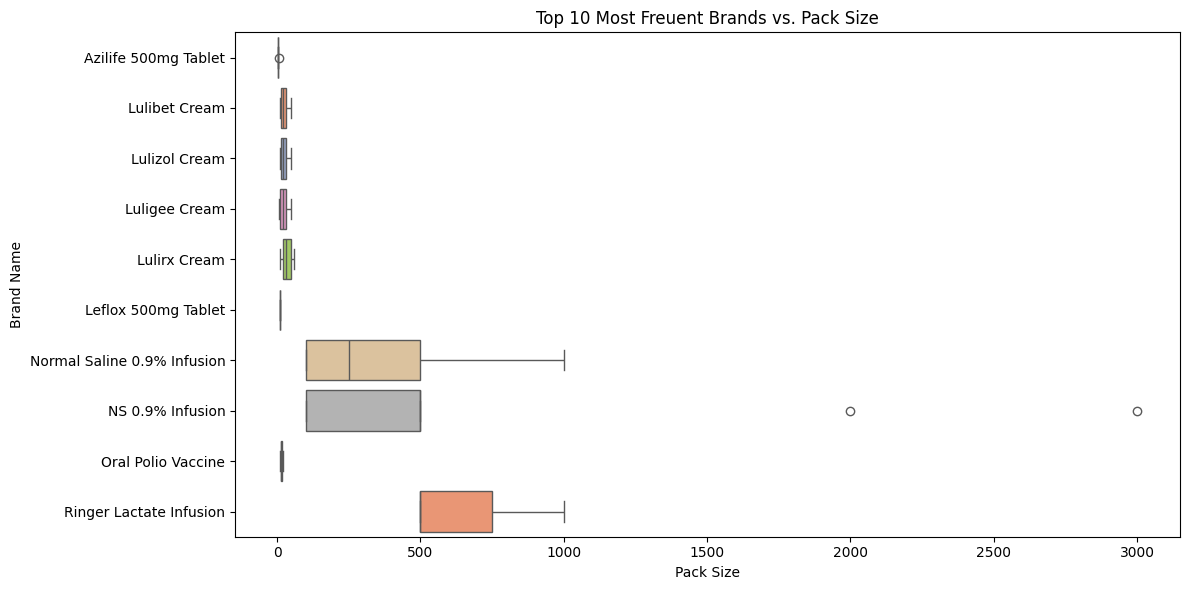

In [13]:
#Brand vs Pack size boxplot
top_brands=df['brand_name'].value_counts().nlargest(10).index

filtered_df=df[df['brand_name'].isin(top_brands)]

filtered_df=filtered_df.dropna(subset=['pack_size'])

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df,x='pack_size',y='brand_name',palette='Set2')
plt.title('Top 10 Most Freuent Brands vs. Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

# Multiariate Analysis

In [23]:
print(df['pack_size'].describe())


count    231643.000000
mean         18.988871
std          36.717320
min           1.000000
25%          10.000000
50%          10.000000
75%          10.000000
max        5000.000000
Name: pack_size, dtype: float64


In [24]:
top_manu = df['manufacturer'].value_counts().head(5).index
df_top = df[df['manufacturer'].isin(top_manu)]


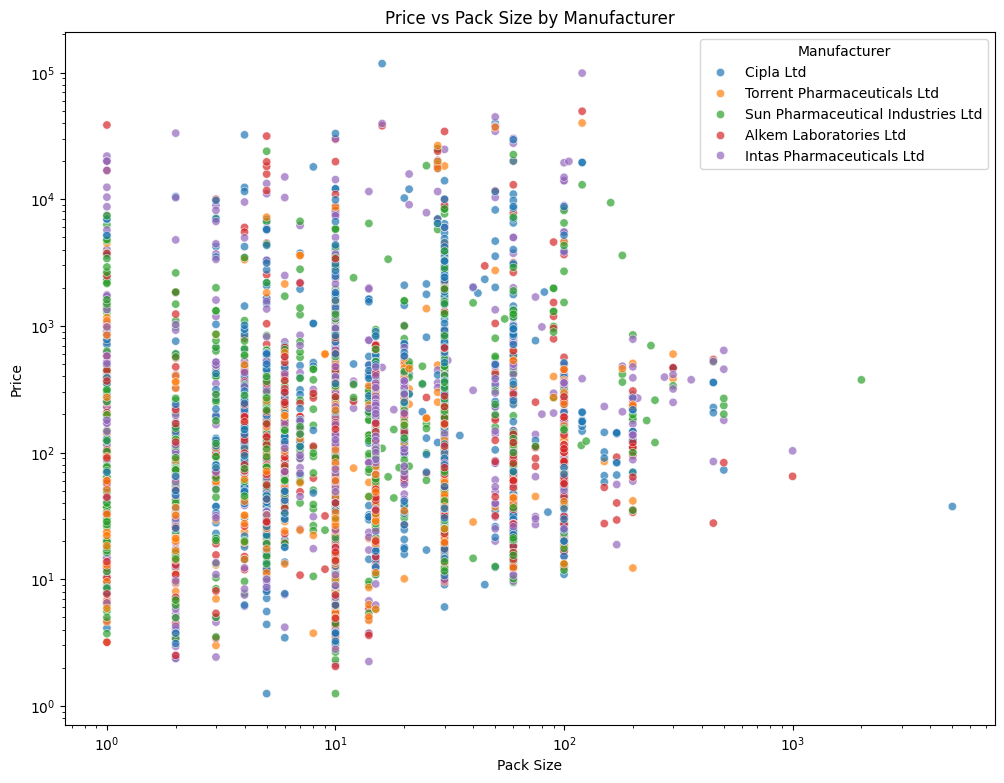

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
sns.scatterplot(
    data=df_top,
    x='pack_size',
    y='price_inr',
    hue='manufacturer',
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pack Size')
plt.ylabel('Price')
plt.title('Price vs Pack Size by Manufacturer')
plt.legend(title='Manufacturer')
plt.show()


Scatterplot of Pack Size vs Price :

1. Larger packs tend to cost more, as expected.

2. Significant price variation within the same pack size indicates other factors like brand name or drug type (special use) affect pricing.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['price_inr', 'pack_size']

corr = df[numeric_cols].corr()

print(corr)


           price_inr  pack_size
price_inr    1.00000    0.01659
pack_size    0.01659    1.00000


In [37]:
import numpy as np
import pandas as pd

df['log_price'] = np.log1p(df['price_inr'])

df['price_per_unit'] = df['price_inr'] / df['pack_size']

df['price_category'] = pd.qcut(df['price_inr'], q=3, labels=['Low', 'Medium', 'High'])

manu_counts = df['manufacturer'].value_counts().to_dict()
df['manufacturer_freq'] = df['manufacturer'].map(manu_counts)

print(df[['price_inr', 'log_price', 'pack_size', 'price_per_unit', 'price_category', 'manufacturer_freq']].head())


   price_inr  log_price  pack_size  price_per_unit price_category  \
0     223.42   5.413519       10.0       22.342000           High   
1     132.36   4.893052        5.0       26.472000           High   
2     118.00   4.779123      100.0        1.180000           High   
3     218.81   5.392764       10.0       21.881000           High   
4      10.96   2.481568       15.0        0.730667            Low   

   manufacturer_freq  
0                394  
1                839  
2               1131  
3                351  
4                351  


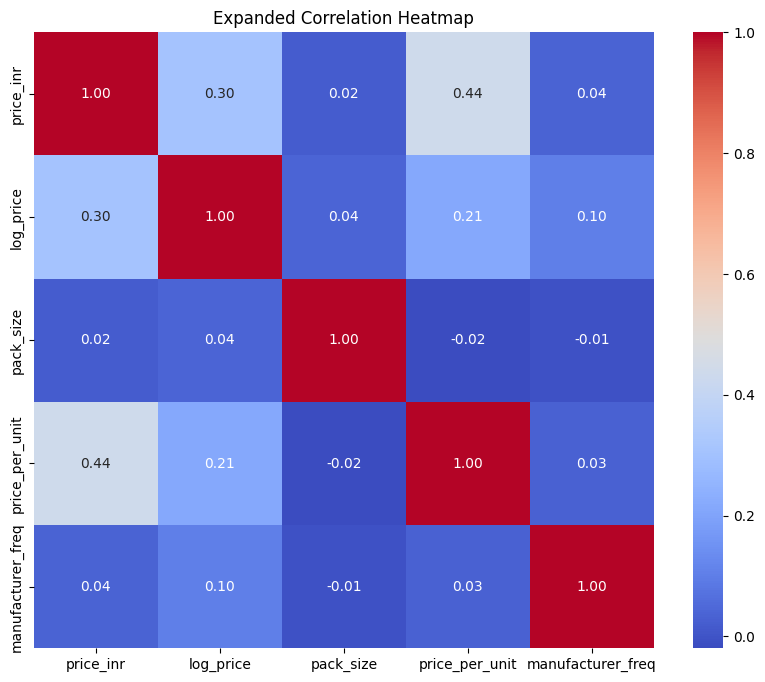

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Expanded Correlation Heatmap')
plt.show()


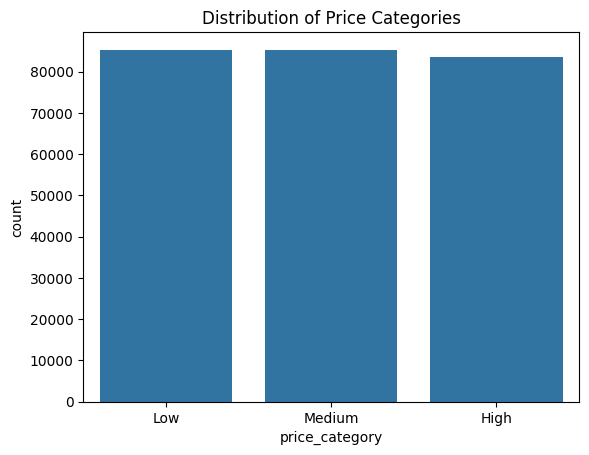

In [40]:
sns.countplot(data=df, x='price_category')
plt.title('Distribution of Price Categories')
plt.show()


KEY INSIGHTS :
1. The Indian pharma market shows high product diversity, with significant price spread across brands and pack sizes.
2. Bulk pack sizes generally lower the per-unit cost but that does not guarantee low total price of the pack.
3. Brand positioning and manufacturer reputation has a strong influence in pricing strategies.
4. Critical disease treatment medicines serve as outliers here as they can be very expensive and not everyday usage drugs.
